# Simple Regression Dataset - Linear Regression vs. XGBoost

Model with XGBoost training locally to notebook
XGBoost, or [Extreme Gradient Boosting](https://www.datacamp.com/community/tutorials/xgboost-in-python), is a family of boosting algorithms that uses gradient boosting framework at its core.

* Later in the project's progression, *SageMaker's* XGBoost algorithm
* This will take several minutes to train (even with a small amount of data)
* When algorithm supported by *Python*, the data can be locally to the instance
* In this section: Compare XBGoost to Linear Regression against dataset

**Kernel used:** Conda with TensorFlow Python 3.6.7

## Install XGboost into the Notebook

Here: I am using *conda* to install. For those familiar, this is the same installer found in *Anaconda Navigator*

Ensure that a kernel is running before installing.
***Note:*** *This may take several minutes for the initial installation.*

### First update *conda* to latest version

In [65]:
!conda install conda -y

Solving environment: done

## Package Plan ##

  environment location: /home/ec2-user/anaconda3/envs/JupyterSystemEnv

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         156 KB
    ------------------------------------------------------------
                                           Total:         156 KB

The following NEW packages will be INSTALLED:

  conda              pkgs/main/linux-64::conda-4.8.2-py36_0
  conda-package-han~ pkgs/main/linux-64::conda-package-handling-1.6.0-py36h7b6447c_0
  pycosat            pkgs/main/linux-64::pycosat-0.6.3-py36h7b6447c_0
  ruamel_yaml        pkgs/main/linux-64::ruamel_yaml-0.15.87-py36h7b6447c_0
  tqdm               pkgs/main/noarch::tqdm-4.42.0-py_0
  yaml               pkgs/main/linux-64::yaml-0.1.7-had09818_2

The following packages will be UPDATED:

  c

In [66]:
!pip install --upgrade pip

Solving environment: done

## Package Plan ##

  environment location: /home/ec2-user/anaconda3/envs/JupyterSystemEnv

  added / updated specs:
    - pip


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pip-20.0.2                 |           py36_1         1.7 MB
    ------------------------------------------------------------
                                           Total:         1.7 MB

The following packages will be UPDATED:

  pip                                         20.0.2-py36_0 --> 20.0.2-py36_1



pip-20.0.2           | 1.7 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


### Ensure required packages are installed

In [39]:
!conda list numpy
!conda list pandas
!conda list python
!conda list xgboost
!conda list matplotlib
!conda list sagemaker

# packages in environment at /home/ec2-user/anaconda3/envs/JupyterSystemEnv:
#
# Name                    Version                   Build  Channel
numpy                     1.17.5           py36h95a1406_0    conda-forge
# packages in environment at /home/ec2-user/anaconda3/envs/JupyterSystemEnv:
#
# Name                    Version                   Build  Channel
pandas                    0.22.0                   pypi_0    pypi
# packages in environment at /home/ec2-user/anaconda3/envs/JupyterSystemEnv:
#
# Name                    Version                   Build  Channel
gitpython                 3.0.5                    pypi_0    pypi
ipython                   7.11.1           py36h39e3cac_0  
ipython_genutils          0.2.0                    py36_0  
python                    3.6.7             h381d211_1004    conda-forge
python-dateutil           2.8.1                      py_0  
# packages in environment at /home/ec2-user/anaconda3/envs/JupyterSystemEnv:
#
# Name                   

In [ ]:
!conda install matplotlib pandas -c conda-forge -y

### Update SageMaker
SageMaker 1.50.9.post0 as of 2/6/2020

In [ ]:
!pip install sagemaker==1.50.9.post0

### Next: Ensure XGBoost installed
**Caution**: **AWS Sagemaker** uses its own called *sagemaker.xgboost* (requiring no additional installation outside of *sagemaker* package on AWS instance)

XGBoost will install its required *numpy* package (At this time, XGBoost (0.90) requires numpy (1.16.4) and will downgrade if needed.)

In [68]:
!pip3 install xgboost==0.90

    100% |████████████████████████████████| 142.8MB 354kB/s eta 0:00:01   62% |████████████████████▏           | 89.9MB 59.9MB/s eta 0:00:01
Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: '/usr/lib/python3.6/dist-packages/xgboost-0.90.dist-info'
Consider using the `--user` option or check the permissions.

You are using pip version 19.0.2, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Libraries

In [40]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error # to calculate the regression loss

In [54]:
# XGBoost
import sagemaker.xgboost as xgb # using industry standard xgb
from sklearn.linear_model import LinearRegression

### Data Read

In [42]:
df = pd.read_csv('linear_data.csv')

In [43]:
df.head()

,x,y
0,0,21.315865
1,1,20.152790
2,2,2.545997
3,3,22.916162
4,4,34.213360


### Plot the dataset

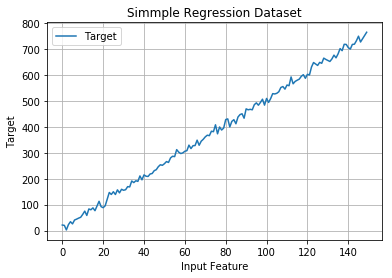

In [44]:
plt.plot(df.x, df.y, label='Target')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.legend()
plt.title('Simmple Regression Dataset')
plt.show()

### Load Training and Validation Datasets

In [45]:
train_file = 'linearTrain.csv'
validation_file = 'linearValidation.csv'

# Specify the column names, since the files do not have headers
df_train = pd.read_csv(train_file, names=['y','x'])
df_validation = pd.read_csv(validation_file, names=['y','x'])

In [46]:
df_train.head() # data check

,y,x
0,446.933412,87
1,558.291927,111
2,62.330262,10
3,465.445440,91
4,251.525797,49


In [47]:
df_validation.head()

,y,x
0,446.933412,87
1,558.291927,111
2,62.330262,10
3,465.445440,91
4,251.525797,49


### Plot the datasets

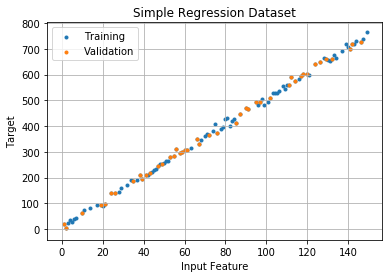

In [48]:
plt.scatter(df_train.x, df_train.y, label='Training', marker='.')
plt.scatter(df_validation.x, df_validation.y, label='Validation', marker='.')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.title('Simple Regression Dataset')
plt.legend()
plt.show()

### Separating Features and Targets for Training and Validation
This is in preparation for use in XGBoost's regressor
*Note: Remember that Python indices start at 0*

In [49]:
x_train = df_train.iloc[:,1] # Features pull from 2nd column to the end
y_train = df_train.iloc[:,0].ravel() # Target: 1st Column (0th) Recall: ravel to flatten array

x_validation = df_validation.iloc[:,1]
y_validation = df_validation.iloc[:,0].ravel()

## Create an XGBoosst Regressor for this instance

Find Distributed (Deep) Machine Learning Community's XGBoost Training Parameter Reference [here](https://github.com/dmlc/xgboost/blob/master/doc/parameter.rst)

Find Amazon's SageMaker XGBoost documentation [here](https://docs.aws.amazon.com/sagemaker/latest/dg/xgboost_hyperparameters.html)

In this project, I updated the following parameters (also, noted later)
* objective='reg:squarederror'


In [58]:
regressor = 
# Going with defaults, except for objective. reg:linear is deprecated.

AttributeError: module 'sagemaker.xgboost' has no attribute 'XGBReggesor'

In [56]:
# Default Options display
regressor

<module 'sagemaker.xgboost' from '/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/sagemaker/xgboost/__init__.py'>

### Training the model

In [57]:
# Provide the Training and Validations Datasets
# XGBoost will report the training and validation errors
# While training, the errors should trend downwards
regressor.fit(x_train,y_train, eval_set = [(x_train, y_train), (x_validation, y_validation)])

AttributeError: module 'sagemaker.xgboost' has no attribute 'fit'

In [ ]:
!conda list numpy
!conda list pandas
!conda list python
!conda list xgboost
!conda list matplotlib

### Major Library Versions

| Library | Version |
|---------|:--------|
| matplotlib | 3.1.3 |
| numpy | 1.17.5 |
| pandas | 0.22.0 |
| python | 3.6.7 |
| sagemaker | 1.50.9.post0 |
| xgboost | 0.90 |

In [ ]:
!conda list x*